In [1]:
import sys
import random
import numpy as np
import matplotlib.pyplot as plt
import math


In [2]:
def printProgress (iteration, total, prefix = '', suffix = '', decimals = 1, barLength = 100):
    formatStr = "{0:." + str(decimals) + "f}"
    percent = formatStr.format(100 * (iteration / float(total)))
    filledLength = int(round(barLength * iteration / float(total)))
    bar = '#' * filledLength + '-' * (barLength - filledLength)
    sys.stdout.write('\r%s |%s| %s%s %s' % (prefix, bar, percent, '%', suffix)),
    if iteration == total:
        sys.stdout.write('\n')
    sys.stdout.flush()

In [3]:
def Initialize(nSites):
    state = np.zeros((nSites,nSites))
    for i in range(nSites):
        for j in range(nSites):
            if random.randrange(0,2) > 0.5: # dipole spin up
                state[i][j] = 1
        else : state[i][j] = -1 # dipole spin down
            
    return state

def dU(i, j, nSites, state):
    m = nSites - 1
    if i == 0 : # state[0,j]
        top = state[m,j]
    else :
        top = state[i-1,j]
    if i == m : # state[m,j]
        bottom = state[0,j]
    else :
        bottom = state[i+1,j]
    if j == 0 : # state[i,0]
        left = state[i,m]
    else :
        left = state[i,j-1]
    if j == m : # state[i,m]
        right = state[i,0]
    else :
        right = state[i,j+1]
        
    return 2*state[i,j]*(top+bottom+left+right)


In [40]:
nSites = 60

state = Initialize(nSites)

axis = [0]*nSites
for i in range(nSites):
    axis[i] = i
    
print("Initializing done")

Initializing done


 |##################################################| 100.0% process done
 |#################################################-| 98.3% plotting done


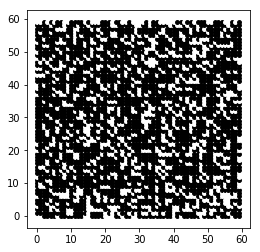

In [50]:
T = 300
step = nSites**2

for k in range(step):
    i = int(random.uniform(0,1)*nSites)
    j = int(random.uniform(0,1)*nSites)
    dE = dU(i,j,nSites,state)
    if dE <= 0 :
        state[i][j] = -state[i][j]
    elif random.uniform(0,1) < math.exp(-dE/T) :
        state[i][j] = -state[i][j]
    printProgress(k, step, barLength = 50)

print("process done")
    
for i in range(nSites):
    for j in range(nSites):
        if state[i][j] > 0.5 :
            plt.scatter(axis[i],axis[j],color = 'white', s = 15)
        if state[i][j] < 0.5 :
            plt.scatter(axis[i],axis[j],color = 'black', s = 15)
    printProgress(i, nSites, barLength = 50)

print("plotting done")
    
fig_1 = plt.gcf()
fig_1.set_size_inches(4, 4, forward=True)
plt.show()

In [49]:
T = 0.3
step = nSites**2

for k in range(step):
    i = int(random.uniform(0,1)*nSites)
    j = int(random.uniform(0,1)*nSites)
    dE = dU(i,j,nSites,state)
    if dE <= 0 :
        state[i][j] = -state[i][j]
    elif random.uniform(0,1) < math.exp(-dE/T) :
        state[i][j] = -state[i][j]
    printProgress(k, step, barLength = 50)

print("process done")
    
for i in range(nSites):
    for j in range(nSites):
        if state[i][j] > 0.5 :
            plt.scatter(axis[i],axis[j],color = 'white', s = 15)
        if state[i][j] < 0.5 :
            plt.scatter(axis[i],axis[j],color = 'black', s = 15)
    printProgress(i, nSites, barLength = 50)

print("plotting done")
    
fig_2 = plt.gcf()
fig_2.set_size_inches(4, 4, forward=True)
plt.show()

 |##################################################| 100.0% process done
 |#################################################-| 98.3% plotting done
